<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/advanced/workshop3/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

Data Description: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, boston.target, test_size=0.2)

In [ ]:
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
107,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69
287,0.03871,52.5,5.32,0.0,0.405,6.209,31.3,7.3172,6.0,293.0,16.6,396.90,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

In [ ]:
pd.DataFrame(df_train, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419370,-0.456820,-0.409900,-0.272888,-0.340075,-0.213750,0.562102,-0.751446,-0.539089,-0.172125,1.129296,0.355583,0.191275
1,0.129599,-0.456820,0.974765,-0.272888,1.345925,-3.883011,0.659273,-0.993366,1.634257,1.503644,0.803314,0.014531,-0.805298
2,-0.417200,-0.456820,-0.409900,-0.272888,-0.340075,0.644222,0.371358,-0.440067,-0.539089,-0.172125,1.129296,0.428673,-0.476443
3,1.083856,-0.456820,0.974765,-0.272888,0.204895,-0.628436,-0.355626,-0.810738,1.634257,1.503644,0.803314,-3.397544,0.420044
4,-0.430841,1.850672,-0.880164,-0.272888,-1.319317,-0.096494,-1.377724,1.716590,-0.424703,-0.712887,-0.873167,0.450797,-0.802438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.280335,-0.456820,-0.470860,-0.272888,-0.186802,-1.010234,1.026364,0.044580,-0.653476,-0.629693,1.175865,0.240624,1.182129
400,0.272565,-0.456820,0.974765,-0.272888,-0.237893,0.677111,0.191412,-0.176911,1.634257,1.503644,0.803314,0.411202,-0.716650
401,0.428144,-0.456820,0.974765,-0.272888,1.192652,-0.805751,0.986776,-0.844518,1.634257,1.503644,0.803314,0.425262,0.623076
402,-0.368633,0.422224,-1.076107,-0.272888,0.741349,1.324880,0.439738,-0.756340,-0.539089,-0.885218,-2.549649,0.408411,-0.452136


In [ ]:
df_train.shape

(404, 13)

In [ ]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(restore_best_weights=True, patience=50)
dropout = 0.5

# model = keras.Sequential([
#   layers.Dense(5, activation='relu', input_shape=[13]),
#   layers.Dense(1),
# ])

model = keras.Sequential([
  layers.Dense(512, activation='tanh', input_shape=[13]),
  layers.Dropout(rate=dropout),
  layers.BatchNormalization(),
  layers.Dense(512, activation='tanh'),
  layers.Dropout(rate=dropout),
  layers.BatchNormalization(),
  layers.Dense(512, activation='tanh'),
  layers.Dropout(rate=dropout),
  layers.BatchNormalization(),
  layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
history = model.fit(
    df_train, y_train,
    validation_data=(df_val, y_val),
    batch_size=32,
    epochs=500,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/500
12/12 [==============================] - 1s 32ms/step - loss: 566.5407 - val_loss: 500.0870
Epoch 2/500
12/12 [==============================] - 0s 16ms/step - loss: 529.9676 - val_loss: 510.4326
Epoch 3/500
12/12 [==============================] - 0s 14ms/step - loss: 503.3256 - val_loss: 500.0465
Epoch 4/500
12/12 [==============================] - 0s 17ms/step - loss: 502.7313 - val_loss: 505.0052
Epoch 5/500
12/12 [==============================] - 0s 15ms/step - loss: 472.3144 - val_loss: 477.5847
Epoch 6/500
12/12 [==============================] - 0s 15ms/step - loss: 434.9257 - val_loss: 449.0403
Epoch 7/500
12/12 [==============================] - 0s 17ms/step - loss: 408.6580 - val_loss: 432.3473
Epoch 8/500
12/12 [==============================] - 0s 15ms/step - loss: 358.3596 - val_loss: 370.6516
Epoch 9/500
12/12 [==============================] - 0s 15ms/step - loss: 336.3611 - val_loss: 325.4141
Epoch 10/500
12/12 [==============================] - 0s 15ms/st

Minimum validation loss: 15.361479759216309


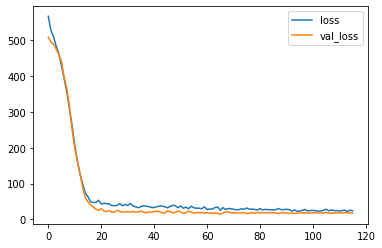

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
import sklearn.metrics as metrics

model.predict(df_test)

metrics.mean_squared_error(model.predict(df_test), y_test)

15.25734609509951

Hyperparameter Tuning:
* learning rate
* no. of layers
* no. of hidden units
* batch size
* regularization
 * dropout
 * batch normalization

# **Data Set for Exploration**

https://www.kaggle.com/shwetabh123/mall-customers